In [1]:
### conflits with Deepnote ###

# matplotlib inline plotting_dk
%matplotlib inline
# make inline plotting_dk higher resolution
%config InlineBackend.figure_format = 'svg'

### conflits with Deepnote ###

In [2]:
# imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re


plt.style.use('ggplot')

In [3]:
start_date = '01-01-2010'
end_date = '08-01-2020'

# seed random numbers
np.random.seed(5)

# number of bootstraps
m = 10000

In [4]:
def readFixData(file_fix, header_prefix):
    # read data
    df = pd.read_excel(f'Samlet Data - {file_fix} Fonde.xlsx', engine='openpyxl', sheet_name='returns')
    
    # slice on dates
    df = df.loc[(df.DATE <= end_date) & (df.DATE >= start_date)].set_index('DATE')
    df.index.name = None

    # funds
    mf_cols = [i for i in df.columns if not re.findall(string=i, pattern='\_.+')]
    factor_cols = [i for i in df.columns if re.findall(string=i, pattern='\_.+')]

    meta = pd.read_excel(f'Samlet Data - {file_fix} Fonde.xlsx', engine='openpyxl', sheet_name='meta')

    # Annualize all returns (smart for interpreting alpha also as annual abnormal return)
    for mf in mf_cols:
        df[mf] = df[mf] - df['D_rf']

    df[mf_cols] = df[mf_cols] * 12 * 100
    df[factor_cols] = df[factor_cols] * 12 * 100
    
    return meta, df



meta_gl, returns_gl = readFixData('Globale', 'W')
meta_dk, returns_dk = readFixData('Danske', 'D')

display(meta_gl.head())
display(meta_dk.head())
display(returns_gl.head())
display(returns_dk.head())

,Name,ID in returns,ISIN,IFR-kategorier,Aktiv/Passiv,First Date,Last Date,Years Active
0,"Alm. Brand Invest, Globale Aktier ETIK",m0,DK0010270693,Aktier Globale,Aktiv,2000-01-12,2020-01-08,19.67
1,BankInvest Basis Globale Aktier Akk. A,m1,DK0010296227,Aktier Globale,Aktiv,2000-01-01,2020-01-08,20.58
2,BankInvest Basis Globale Aktier A,m2,DK0015773873,Aktier Globale,Aktiv,2000-01-01,2020-01-08,20.58
3,C WorldWide Globale Aktier KL Klasse A,m3,DK0010157965,Aktier Globale,Aktiv,2000-01-01,2020-01-08,20.58
4,"Danske Invest Global Indeks - Akkumulerende, k...",m4,DK0016248222,Aktier Globale,Passiv,2003-01-10,2020-01-08,16.83


,Name,ID in returns,ISIN,IFR-kategorier,Aktiv/Passiv,First Date,Last Date,Years Active
0,BankInvest Danske Aktier A,m0,DK0016060346,Aktier Danmark,Aktiv,2000-01-10,2020-01-08,19.83
1,C WorldWide Danmark KL,m1,DK0010249655,Aktier Danmark,Aktiv,2000-01-01,2020-01-08,20.58
2,"Danske Invest Danmark - Akkumulerende, klasse DKK",m2,DK0016208515,Aktier Danmark,Aktiv,2002-01-12,2020-01-08,17.67
3,"Danske Invest Danmark Fokus, klasse DKK d",m3,DK0060244325,Aktier Danmark,Aktiv,2000-01-01,2020-01-08,20.58
4,"Danske Invest Danmark Indeks ex OMXC20, klasse...",m4,DK0060244242,Aktier Danmark,Passiv,2000-01-01,2020-01-08,20.58


,D_rf,W_R,W_SMB,W_HML,m0,m1,m2,m3,m4,m5,...,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41
2020-08-01,-0.24,63.204,-16.176,-45.228,77.76,49.44,49.80,36.96,71.64,65.52,...,41.64,49.68,10.92,36.48,36.12,44.04,28.20,28.20,13.56,12.96
2020-07-01,-0.24,-0.780,-9.960,-48.888,7.32,-4.56,-5.04,10.80,40.08,-5.88,...,-29.28,-7.92,-10.56,20.04,21.96,-33.00,-29.76,-31.80,-15.36,-15.12
2020-06-01,-0.24,18.252,-1.680,-44.796,27.84,19.56,19.32,31.92,28.68,21.00,...,18.00,32.16,-3.48,30.84,31.68,17.40,8.52,9.84,-0.36,-0.36
2020-05-01,-0.24,40.236,30.852,-43.056,39.96,27.72,28.68,15.24,56.40,38.04,...,15.96,33.48,20.52,45.48,43.08,15.48,12.72,12.84,9.00,9.60
2020-04-01,-0.24,141.156,32.772,-47.988,118.80,139.20,139.08,131.40,125.40,133.68,...,114.36,116.64,104.64,128.16,127.80,117.12,135.00,134.88,79.92,80.28


,D_rf,D_R,D_SMB,D_HML,m0,m1,m2,m3,m4,m5,...,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19
2020-08-01,-0.288,37.776,59.172,-50.532,66.408,49.968,48.888,51.048,83.568,44.088,...,61.368,75.528,64.368,66.408,54.888,54.888,54.288,52.488,62.448,67.848
2020-07-01,-0.276,44.340,17.124,145.716,72.396,62.436,69.276,71.676,36.036,64.236,...,65.196,67.116,74.436,75.276,66.876,66.756,63.396,62.916,63.396,83.436
2020-06-01,-0.264,14.124,-15.408,29.112,22.224,12.024,9.624,8.424,-6.576,9.384,...,25.704,23.544,15.024,13.464,8.664,8.664,-10.656,-9.936,13.464,16.824
2020-05-01,-0.216,68.532,94.008,-50.712,106.176,96.216,102.936,101.976,99.456,99.576,...,94.656,101.016,92.256,95.976,110.016,110.256,100.896,99.696,88.176,110.376
2020-04-01,-0.228,102.324,75.708,-8.628,124.068,103.788,114.948,109.188,101.868,113.748,...,116.268,114.108,127.188,135.348,122.628,121.908,137.028,136.908,112.428,125.148


In [5]:
def fitModel(meta, df):
    results = []  # list of dicts
    bootstrapAlpha = {}  # dict of lists
    
    # funds
    mf_cols = [i for i in df.columns if not re.findall(string=i, pattern='\_.+')]
    
    # factors except risk-free rate
    factor_cols = [i for i in df.columns if re.findall(string=i, pattern='\_[RSH]+')]
    
    headerPrefix = factor_cols[0][0]  # equals W or D
    
    T, n = df[mf_cols].shape  # tuple(number of T obs, number of funds)
    
    for fund in mf_cols:
        print(fund)
        
        Y = df[fund]
        X = sm.add_constant(df[factor_cols])
        X = X.rename(columns={'const': 'alpha'})
        
        mdlFit = sm.OLS(endog=Y, exog=X).fit()
        res = mdlFit.params.to_dict()
        
        # save all parameters and t-stats
        res['fund'] = fund
        res['T: b=1'] = (res[f'{headerPrefix}_R'] - 1) / mdlFit.bse[f'{headerPrefix}_R']
        res['T: a=0'] = (res['alpha']) / mdlFit.bse['alpha']
        res['T: s=0'] = (res[f'{headerPrefix}_SMB']) / mdlFit.bse[f'{headerPrefix}_SMB']
        res['T: h=0'] = (res[f'{headerPrefix}_HML']) / mdlFit.bse[f'{headerPrefix}_HML']
        res['R2'] = mdlFit.rsquared

        # save results
        results.append(res)
        
        # save residuals
        resid = mdlFit.resid
        
        # initiate vector for saved alphas
        bootstrapAlpha[fund] = list()
        
        for bootstrap in range(m):
            residSample = np.random.choice(resid, T, replace=True)
            
            dataGen = 0 + res[f'{headerPrefix}_R']*df[f'{headerPrefix}_R'] + \
            res[f'{headerPrefix}_SMB']*df[f'{headerPrefix}_SMB'] + \
            res[f'{headerPrefix}_HML']*df[f'{headerPrefix}_HML'] + residSample

            mdlFit = sm.OLS(endog=dataGen, exog=X).fit()

            bootstrapAlpha[fund].append(mdlFit.params['alpha'])
            
    return (results, bootstrapAlpha)

In [6]:
def bootstrapSort(results, bootstrapAlpha):
    # read data as Pandas DataFrame
    results = pd.DataFrame(results).set_index('fund')
    bootstrapAlpha = pd.DataFrame(bootstrapAlpha)
    
    # keep track of best funds
    alphaSample = results['alpha'].sort_values()
    idx = alphaSample.index
    
    # sort and fix bootstrapped alphas
    bootstrapAlpha = bootstrapAlpha.values.transpose()
    bootstrapAlpha = np.sort(bootstrapAlpha, axis=0)
    bootstrapAlpha = pd.DataFrame(bootstrapAlpha, index=idx).transpose()
    
    # calculate quantiles for CI
    alphaQuantiles = pd.concat([bootstrapAlpha.quantile(0.05), bootstrapAlpha.quantile(0.95)], axis=1)
    results = results.join(alphaQuantiles)
    
    return results, bootstrapAlpha

In [7]:
def cleanResults(results, bootstrapAlpha, meta):
    results = results.rename(columns={0.05: 'CI: 5%', 0.95: 'CI: 95%'})
    
    def check_significance(alpha, cv0, cv1):
        if alpha < cv0:
            return 1
        elif alpha > cv1:
            return 2
        else:
            return 0

    results['sig'] = results.apply(lambda x: check_significance(x['alpha'], 
                                                                x['CI: 5%'], 
                                                                x['CI: 95%']), axis=1)
    
    results.index = results.index.map(meta.set_index('ID in returns')['Name'].to_dict())
    
    results = pd.DataFrame(meta.set_index('Name')['Aktiv/Passiv']).join(results)
    results.index.name = None
    
    bootstrapAlpha = bootstrapAlpha.rename(columns=meta.set_index('ID in returns')['Name'].to_dict())
    
    return results, bootstrapAlpha

In [8]:
fit_dk, alphas_dk = fitModel(meta_dk, returns_dk)
fit_dk, alphas_dk = bootstrapSort(fit_dk, alphas_dk)
fit_dk, alphas_dk = cleanResults(fit_dk, alphas_dk, meta_dk)

m0
m1
m2
m3
m4
m5
m6
m7
m8
m9
m10
m11
m12
m13
m14
m15
m16
m17
m18
m19


In [9]:
fit_gl, alphas_gl = fitModel(meta_gl, returns_gl)
fit_gl, alphas_gl = bootstrapSort(fit_gl, alphas_gl)
fit_gl, alphas_gl = cleanResults(fit_gl, alphas_gl, meta_gl)

m0
m1
m2
m3
m4
m5
m6
m7
m8
m9
m10
m11
m12
m13
m14
m15
m16
m17
m18
m19
m20
m21
m22
m23
m24
m25
m26
m27
m28
m29
m30
m31
m32
m33
m34
m35
m36
m37
m38
m39
m40
m41


In [10]:
def plotData(results, bootstrapAlpha, sort_col='alpha'):
    bestFund = results.loc[results[sort_col] == results[sort_col].max()]
    worstFund = results.loc[results[sort_col] == results[sort_col].min()]
    
    bestFundAlpha = bootstrapAlpha[bestFund.index]
    bestFundAlpha.columns.name = None
    
    worstFundAlpha = bootstrapAlpha[worstFund.index]
    worstFundAlpha.columns.name = None
    
    return {
        'bestFund': bestFund[sort_col].values[0],
        'worstFund': worstFund[sort_col].values[0],
        'bestFundAlpha': bestFundAlpha,
        'worstFundAlpha': worstFundAlpha,
        'alphaMeans': bootstrapAlpha.mean(axis=0).reset_index(drop=True),
        'estimatedAlphas': results['alpha'].reset_index(drop=True)
    }
    
    
plotting_dk = plotData(fit_dk, alphas_dk)
plotting_gl = plotData(fit_gl, alphas_gl)

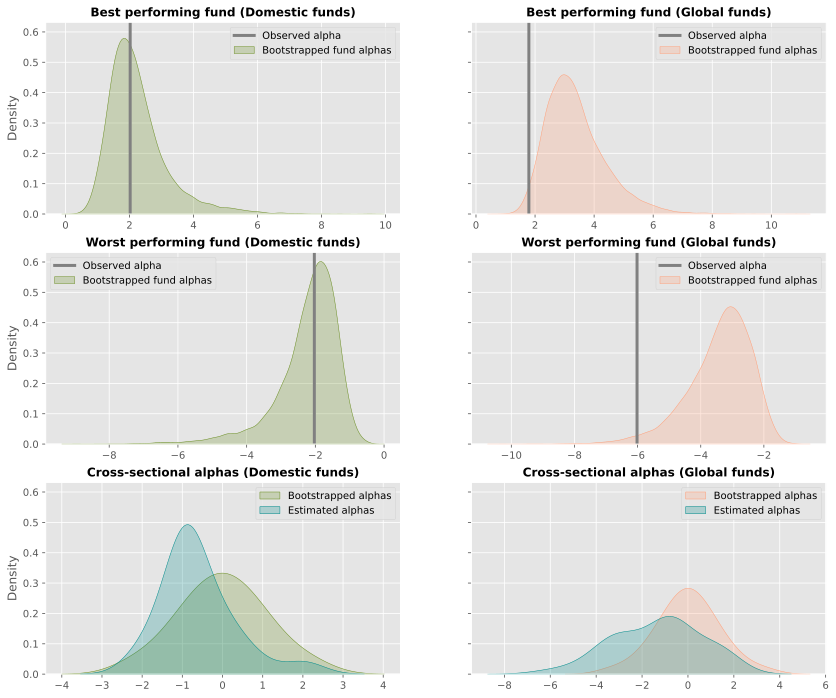

In [11]:
sns.color_palette("hls")

title_size = 12
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=True, figsize=(14, 12))

# first col (DK)
sns.kdeplot(data=plotting_dk['bestFundAlpha'], x=plotting_dk['bestFundAlpha'].columns[0], ax=ax[0,0], fill=True, label='Bootstrapped fund alphas', color='olivedrab')
sns.kdeplot(data=plotting_dk['worstFundAlpha'], x=plotting_dk['worstFundAlpha'].columns[0], ax=ax[1,0], fill=True, label='Bootstrapped fund alphas', color='olivedrab')
sns.kdeplot(plotting_dk['alphaMeans'], ax=ax[2,0], fill=True, label='Bootstrapped alphas', color='olivedrab')
sns.kdeplot(plotting_dk['estimatedAlphas'], ax=ax[2,0], fill=True, label='Estimated alphas', color='darkcyan')

ax[0,0].axvline(plotting_dk['bestFund'], color='grey', linewidth=3, label='Observed alpha')
ax[1,0].axvline(plotting_dk['worstFund'], color='grey', linewidth=3, label='Observed alpha')


# second col (GL)
sns.kdeplot(data=plotting_gl['bestFundAlpha'], x=plotting_gl['bestFundAlpha'].columns[0], ax=ax[0,1], fill=True, label='Bootstrapped fund alphas', color='lightsalmon')
sns.kdeplot(data=plotting_gl['worstFundAlpha'], x=plotting_gl['worstFundAlpha'].columns[0], ax=ax[1,1], fill=True, label='Bootstrapped fund alphas', color='lightsalmon')
sns.kdeplot(plotting_gl['alphaMeans'], ax=ax[2,1], fill=True, label='Bootstrapped alphas', color='lightsalmon')
sns.kdeplot(plotting_gl['estimatedAlphas'], ax=ax[2,1], fill=True, label='Estimated alphas', color='darkcyan')

ax[0,1].axvline(plotting_gl['bestFund'], color='grey', linewidth=3, label='Observed alpha')
ax[1,1].axvline(plotting_gl['worstFund'], color='grey', linewidth=3, label='Observed alpha')


for axes in ax.reshape(-1):
    axes.set_xlabel(None)
    axes.legend()
    
ax[0,0].set_title('Best performing fund (Domestic funds)', fontsize=title_size, fontweight='semibold')
ax[1,0].set_title('Worst performing fund (Domestic funds)', fontsize=title_size, fontweight='semibold')
ax[2,0].set_title('Cross-sectional alphas (Domestic funds)', fontsize=title_size, fontweight='semibold')

ax[0,1].set_title('Best performing fund (Global funds)', fontsize=title_size, fontweight='semibold')
ax[1,1].set_title('Worst performing fund (Global funds)', fontsize=title_size, fontweight='semibold')
ax[2,1].set_title('Cross-sectional alphas (Global funds)', fontsize=title_size, fontweight='semibold')

plt.savefig('figures.png', dpi=750, bbox_inches='tight', facecolor='w', edgecolor='w',)

plt.show()

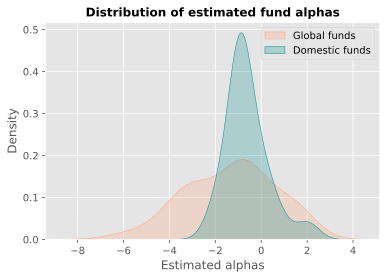

In [12]:

plt.title('Distribution of estimated fund alphas', fontsize=title_size, fontweight='semibold')

sns.kdeplot(fit_gl['alpha'], fill=True, label='Global funds', color='lightsalmon')
sns.kdeplot(fit_dk['alpha'], fill=True, label='Domestic funds', color='darkcyan')

plt.legend()

plt.xlabel('Estimated alphas')

plt.savefig('dist_gl_dk.png', dpi=750, bbox_inches='tight', facecolor='w', edgecolor='w',)

plt.show()

In [28]:
domes = fit_dk
domes = domes[['Aktiv/Passiv', 'alpha']]

glob = fit_gl
glob = glob[['Aktiv/Passiv', 'alpha']]

a = glob.append(domes)

a

,Aktiv/Passiv,alpha
"Alm. Brand Invest, Globale Aktier ETIK",Aktiv,-2.258023
BankInvest Basis Globale Aktier Akk. A,Aktiv,-3.338834
BankInvest Basis Globale Aktier A,Aktiv,-3.229397
C WorldWide Globale Aktier KL Klasse A,Aktiv,-1.716071
"Danske Invest Global Indeks - Akkumulerende, klasse DKK h",Passiv,-1.489979
...,...,...
Nykredit Invest Danske aktier Akk.,Aktiv,-0.712560
SEBinvest AKL Danske Aktier Akkumulerende P,Aktiv,-0.981004
SEBinvest AKL Danske Aktier P,Aktiv,-0.494218
Sparinvest Danske Aktier KL A,Aktiv,0.143101


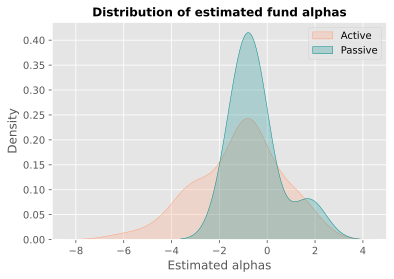

In [29]:

plt.title('Distribution of estimated fund alphas', fontsize=title_size, fontweight='semibold')

sns.kdeplot(a.loc[a['Aktiv/Passiv'] == 'Aktiv']['alpha'], fill=True, label='Active', color='lightsalmon')
sns.kdeplot(a.loc[a['Aktiv/Passiv'] == 'Passiv']['alpha'], fill=True, label='Passive', color='darkcyan')

plt.legend()

plt.xlabel('Estimated alphas')

plt.savefig('dist_ac_ps.png', dpi=750, bbox_inches='tight', facecolor='w', edgecolor='w',)

plt.show()

In [13]:
print(fit_dk.to_latex(float_format=lambda x: '%.2f' % x))

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
{} & Aktiv/Passiv &  alpha &  D\_R &  D\_SMB &  D\_HML &  T: b=1 &  T: a=0 &  T: s=0 &  T: h=0 &   R2 &  CI: 5\% &  CI: 95\% &  sig \\
\midrule
BankInvest Danske Aktier A                         &        Aktiv &   0.05 & 0.89 &   0.38 &   0.05 &   -5.02 &    0.05 &   19.07 &    2.78 & 0.94 &    0.25 &     1.34 &    1 \\
C WorldWide Danmark KL                             &        Aktiv &  -1.86 & 0.94 &   0.40 &   0.06 &   -3.04 &   -1.83 &   22.11 &    4.13 & 0.95 &   -2.37 &    -0.83 &    0 \\
Danske Invest Danmark - Akkumulerende, klasse DKK  &        Aktiv &  -1.19 & 0.96 &   0.38 &   0.06 &   -2.26 &   -1.23 &   21.94 &    3.95 & 0.96 &   -1.58 &    -0.42 &    0 \\
Danske Invest Danmark Fokus, klasse DKK d          &        Aktiv &  -0.94 & 0.98 &   0.37 &   0.08 &   -1.13 &   -0.83 &   18.38 &    4.49 & 0.95 &   -0.82 &     0.16 &    1 \\
Danske Invest Danmark Indeks ex OMXC20, klasse ... &       Passiv &  -0.94 & 0.83 &   0.50 &   0.07 &  

In [14]:
print(fit_gl.to_latex(float_format=lambda x: '%.2f' % x))

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
{} & Aktiv/Passiv &  alpha &  W\_R &  W\_SMB &  W\_HML &  T: b=1 &  T: a=0 &  T: s=0 &  T: h=0 &   R2 &  CI: 5\% &  CI: 95\% &  sig \\
\midrule
Alm. Brand Invest, Globale Aktier ETIK             &        Aktiv &  -2.26 & 0.99 &   0.06 &   0.01 &   -0.18 &   -1.88 &    1.04 &    0.21 & 0.92 &   -0.89 &    -0.08 &    1 \\
BankInvest Basis Globale Aktier Akk. A             &        Aktiv &  -3.34 & 0.98 &   0.07 &   0.09 &   -1.15 &   -3.71 &    1.48 &    2.18 & 0.95 &   -1.88 &    -0.79 &    1 \\
BankInvest Basis Globale Aktier A                  &        Aktiv &  -3.23 & 0.97 &   0.07 &   0.09 &   -1.21 &   -3.54 &    1.60 &    2.24 & 0.95 &   -1.54 &    -0.58 &    1 \\
C WorldWide Globale Aktier KL Klasse A             &        Aktiv &  -1.72 & 0.91 &  -0.19 &  -0.36 &   -2.79 &   -1.25 &   -2.79 &   -5.72 & 0.88 &   -0.72 &     0.06 &    1 \\
Danske Invest Global Indeks - Akkumulerende, kl... &       Passiv &  -1.49 & 0.87 &   0.08 &  -0.00 &  